In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
df = pd.read_csv("./listing.csv")

In [3]:
equipos_londres = df[(df.home_team == "Chelsea")|(df.home_team == "Arsenal")|(df.home_team == "Crystal Palace")|(df.home_team == "Fulham")|(df.home_team == "Tottenham")|(df.home_team == "West Ham")|(df.home_team == "Brentford")|(df.home_team == "Millwall")|(df.home_team == "Queens Park Rangers")|(df.home_team == "AFC Wimbledon")|(df.home_team == "Charlton")]

In [4]:
df2 = equipos_londres.rename(columns={
    'game_date':'Día',
    'tournament':'Campeonato',
    'season':'Temporada',
    'home_team':'Local',
    'away_team':'Visitante',
    'home_team_score':'GolesLocal',
    'away_team_score':'GolesVisitante',
    'home_team_score_extra_time':'GolesLocalProrroga',
    'away_team_score_extra_time':'GolesVisitanteProrroga',
})

In [5]:
columnas = df2[["Día","Campeonato","Local", "Visitante","GolesLocal","GolesVisitante"]]

In [6]:
columnas = columnas.reset_index(drop=True)

In [7]:
resultado = []
for i in columnas.iterrows():
    if i[1]['GolesLocal'] > i[1]['GolesVisitante']:
        resultado.append('1')
    elif i[1]['GolesLocal'] == i[1]['GolesVisitante']:
        resultado.append('x')
    else:
        resultado.append('2')

In [8]:
columnas["Resultado"] = resultado

In [9]:
def createYear(date):
        year = re.search('\d+.',date).end()
        return date[:year - 1]
  
    
columnas["Año"] = columnas["Día"].apply(createYear)

In [10]:
def createMonth(date):
        match = re.search('(\d+)\-([\d+]+)-([\d+]+)',date)
        if match:
            return match.group(2)
  
    
columnas["Mes"] = columnas["Día"].apply(createMonth)

In [11]:
def createDay(date):
        match = re.search('(\d+)\-([\d+]+)-([\d+]+)',date)
        if match:
            return match.group(3)
  
    
columnas["Dia"] = columnas["Día"].apply(createDay)

In [12]:
columnas = columnas.drop(columns = ["Día"])

In [13]:
for indx, row in columnas.iterrows():
    fecha = "{}-{}".format(row["Mes"],row["Año"])
    columnas.loc[indx, 'Año']=fecha

In [14]:
df_final = columnas[["Campeonato","Local","Visitante","GolesLocal","GolesVisitante","Resultado","Año"]]

In [15]:
df_londres = df_final.rename(columns={'Año':'Fecha'})
df_londres

,Campeonato,Local,Visitante,GolesLocal,GolesVisitante,Resultado,Fecha
0,Championship,Crystal Palace,Plymouth,1,1,x,08-2009
1,League One,Charlton,Wycombe,3,2,1,08-2009
2,FA Community Shield,Chelsea,Manchester Utd,2,2,x,08-2009
3,EFL Cup,Millwall,Bournemouth,4,0,1,08-2009
4,EFL Cup,Crystal Palace,Torquay,2,1,1,08-2009
...,...,...,...,...,...,...,...
2453,Championship,Charlton,Preston,0,1,2,11-2019
2454,FA Cup,AFC Wimbledon,Doncaster,1,1,x,11-2019
2455,Championship,Millwall,Charlton,2,1,1,11-2019
2456,Premier League,Chelsea,Crystal Palace,2,0,1,11-2019


In [16]:
argume=[('01-2009',36),('02-2009',33),('03-2009',36),('04-2009',35),('05-2009',36),('06-2009',35),('07-2009',36),('08-2009',36),('09-2009',35),('10-2009',36),('11-2009',35),('12-2009',36),('01-2010',36),('02-2010',33),('03-2010',36),('04-2010',35),('05-2010',36),('06-2010',35),('07-2010',36),('08-2010',36),('09-2010',35),('10-2010',36),('11-2010',35),('12-2010',36),('01-2011',36),('02-2011',33),('03-2011',36),('04-2011',35),('05-2011',36),('06-2011',35),('07-2011',36),('08-2011',36),('09-2011',35),('10-2011',36),('11-2011',35),('12-2011',36),('01-2012',36),('02-2012',34),('03-2012',36),('04-2012',35),('05-2012',36),('06-2012',35),('07-2012',36),('08-2012',36),('09-2012',35),('10-2012',36),('11-2012',35),('12-2012',36),('01-2013',36),('02-2013',33),('03-2013',36),('04-2013',35),('05-2013',36),('06-2013',35),('07-2013',36),('08-2013',36),('09-2013',35),('10-2013',36),('11-2013',35),('12-2013',36),('01-2014',36),('02-2014',33),('03-2014',36),('04-2014',35),('05-2014',36),('06-2014',35),('07-2014',36),('08-2014',36),('09-2014',35),('10-2014',36),('11-2014',35),('12-2014',36),('01-2015',36),('02-2015',33),('03-2015',36),('04-2015',35),('05-2015',36),('06-2015',35),('07-2015',36),('08-2015',36),('09-2015',35),('10-2015',36),('11-2015',35),('12-2015',36),('01-2016',36),('02-2016',34),('03-2016',36),('04-2016',35),('05-2016',36),('06-2016',35),('07-2016',36),('08-2016',36),('09-2016',35),('10-2016',36),('11-2016',35),('12-2016',36),('01-2017',36),('02-2017',33),('03-2017',36),('04-2017',35),('05-2017',36),('06-2017',35),('07-2017',36),('08-2017',36),('09-2017',35),('10-2017',36),('11-2017',35),('12-2017',36),('01-2018',36),('02-2018',33),('03-2018',36),('04-2018',35),('05-2018',36),('06-2018',35),('07-2018',36),('08-2018',36),('09-2018',35),('10-2018',36),('11-2018',35),('12-2018',36),('01-2019',36),('02-2019',33),('03-2019',36),('04-2019',35),('05-2019',36),('06-2019',35),('07-2019',36),('08-2019',36),('09-2019',35),('10-2019',36),('11-2019',35),('12-2019',36)]
def funcioncita(a,b):
    url = f'https://www.tutiempo.net/clima/{a}/ws-37683.html'
    years = requests.get(url)
    soup = BeautifulSoup(years.text, 'html.parser')
    TempMedias = []
    for tag in soup.select('tr'):
        TempMedias.append(tag)
    varia= TempMedias[b]
    return varia.select("td.tc2")[0].text
temps = {}
for e in argume:
    temps[e[0]] = funcioncita(e[0],e[1])
print(temps)

{'01-2009': '4.1', '02-2009': '5.3', '03-2009': '8.5', '04-2009': '11.6', '05-2009': '14.2', '06-2009': '16.8', '07-2009': '18.1', '08-2009': '19.2', '09-2009': '16.3', '10-2009': '13.1', '11-2009': '10.6', '12-2009': '5.1', '01-2010': '2.5', '02-2010': '4.1', '03-2010': '7.2', '04-2010': '10.2', '05-2010': '12', '06-2010': '17', '07-2010': '19.9', '08-2010': '17.2', '09-2010': '15.1', '10-2010': '11.8', '11-2010': '7', '12-2010': '1.8', '01-2011': '5.7', '02-2011': '7.7', '03-2011': '7.6', '04-2011': '13.7', '05-2011': '14.4', '06-2011': '16.1', '07-2011': '17', '08-2011': '17.5', '09-2011': '16.8', '10-2011': '14.3', '11-2011': '10.9', '12-2011': '7.7', '01-2012': '7.1', '02-2012': '5.1', '03-2012': '9.2', '04-2012': '8.9', '05-2012': '13.7', '06-2012': '15.3', '07-2012': '17.2', '08-2012': '18.8', '09-2012': '15.2', '10-2012': '11.2', '11-2012': '8.1', '12-2012': '6.2', '01-2013': '4.6', '02-2013': '3.7', '03-2013': '3.6', '04-2013': '8.5', '05-2013': '11.7', '06-2013': '15.1', '07-

In [17]:
df_londres.head()

,Campeonato,Local,Visitante,GolesLocal,GolesVisitante,Resultado,Fecha
0,Championship,Crystal Palace,Plymouth,1,1,x,08-2009
1,League One,Charlton,Wycombe,3,2,1,08-2009
2,FA Community Shield,Chelsea,Manchester Utd,2,2,x,08-2009
3,EFL Cup,Millwall,Bournemouth,4,0,1,08-2009
4,EFL Cup,Crystal Palace,Torquay,2,1,1,08-2009


In [49]:
df_londres['Temperatura']=1234
for indx, row in df_londres.iterrows():
    temperatura = temps[row['Fecha']]
    df_londres.loc[indx, 'Temperatura']=temperatura
    
df_londres.head(20)

,Campeonato,Local,Visitante,GolesLocal,GolesVisitante,Resultado,Fecha,Temperatura
0,Championship,Crystal Palace,Plymouth,1,1,x,08-2009,19.2
1,League One,Charlton,Wycombe,3,2,1,08-2009,19.2
2,FA Community Shield,Chelsea,Manchester Utd,2,2,x,08-2009,19.2
3,EFL Cup,Millwall,Bournemouth,4,0,1,08-2009,19.2
4,EFL Cup,Crystal Palace,Torquay,2,1,1,08-2009,19.2
5,EFL Cup,Brentford,Bristol City,0,1,2,08-2009,19.2
6,League One,Brentford,Brighton,0,0,x,08-2009,19.2
7,League One,Millwall,Carlisle,0,0,x,08-2009,19.2
8,Premier League,Chelsea,Hull,2,1,1,08-2009,19.2
9,Premier League,Tottenham,Liverpool,2,1,1,08-2009,19.2


In [64]:
df_londres.to_csv("clean.csv")

In [65]:
type(df_londres.GolesLocal)

pandas.core.series.Series

In [69]:
def SumaGoles(Campeonato, Local):
    Cleancsv = pd.read_csv('clean.csv')
    df_n = df_londres[(df_londres == f'{Campeonato}')|(df_londres == f'{Local}')]
    return df_n['GolesLocal'].sum()
                           
SumaGoles('Premier League', 'Chelsea')

0.0

In [25]:
!pip3 install matplotlib

     |████████████████████████████████| 13.2MB 3.0MB/s eta 0:00:01    |██████▉                         | 2.8MB 1.4MB/s eta 0:00:08
     |████████████████████████████████| 71kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 3.8MB/s eta 0:00:011
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
!pip3 install argparse

You should consider upgrading via the 'pip install --upgrade pip' command.


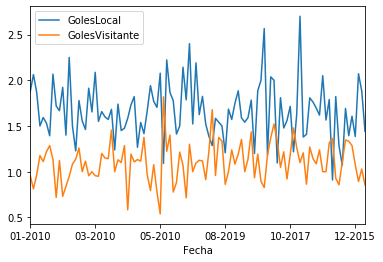

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
df_londres.groupby('Fecha').mean().loc[:,['GolesLocal', 'GolesVisitante']].plot()
plt.show()

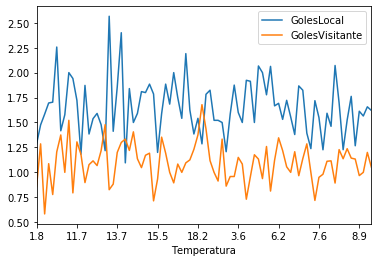

In [41]:
df_londres.groupby('Temperatura').mean().loc[:,['GolesLocal','GolesVisitante']].plot()
plt.show()